# Secciones de Poincare para el Atractor De Lorenz 

In [1]:
import matplotlib. pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from scipy.integrate import odeint

###### Primero, resolvemos las ecuaciones del atractor de Lorenz para graficar su solución.

las ecuaciones son:

\begin{equation}
\frac{dx}{dt} = -y-z
\end{equation}

\begin{equation}
\frac{dy}{dt} = x+ay
\end{equation}

\begin{equation}
\frac{dz}{dt} = b + z(x-c)
\end{equation}

In [2]:
def sol_atrac(var_ini,t,a,b,c ):
    x,y,z = var_ini
    return [a*(y-x), x*(b-z)-y, x*y-c*z]

In [46]:
#Condiciones iniciales:
x = 10
y = -30
z = -5
var_ini=[x,y,z] #ponemos las condiciones iniciales en un arreglo
#Parametros:
a = 10
b = 28 #<--- Variamos este
c = 8/3
#Parametrización:
t = np.linspace(0, 100, 10000000)
atrac = odeint( sol_atrac , var_ini , t , args=(a,b,c) ) # resuelve las ecuaciones diferenciales en la función definida

Text(0.5,0,'$y$')

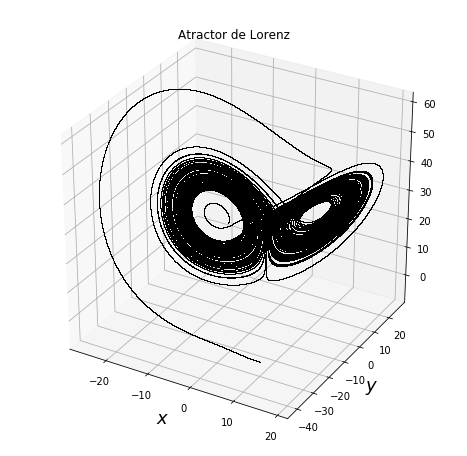

In [47]:
#Graficamos la Solución:
plt.subplots(1, figsize=(8, 8),subplot_kw={'projection':'3d'})
plt.plot(atrac[:,0], atrac[:,1], atrac[:,2], 'k,')
plt.title('Atractor de Lorenz')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)

Text(0,0.5,'$y$')

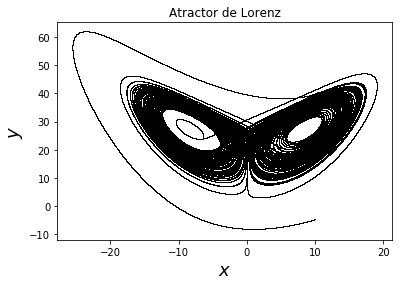

In [48]:
#Graficamos la Solución:
plt.plot(atrac[:,0], atrac[:,2], 'k,')
plt.title('Atractor de Lorenz')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)

Ahora, definimos una función para obtener las secciones de poincare en el plano x-z:

In [49]:
def poincare_y (sol,p):
    x = sol[:,0]
    y = sol[:,1]
    z = sol[:,2]
    x_p = []
    z_p = []
    for i in range(len(y)):
        if float(format(y[i],'0.1f')) == p:
            x_p.append(x[i])
            z_p.append(z[i])
            
    return [x_p,z_p]

In [50]:
x,z = poincare_y(atrac,0.5)

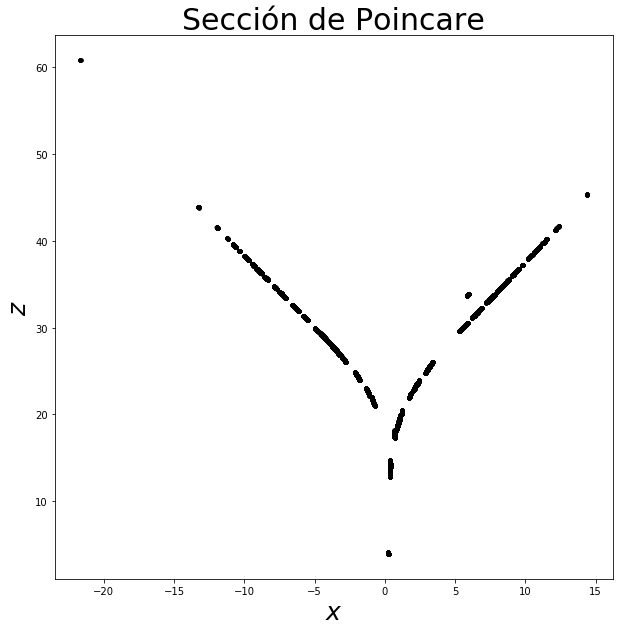

In [51]:
#Graficamos:
plt.subplots(1, figsize=(10,10))
plt.title('Sección de Poincare', fontsize = 30)
plt.plot(x, z, 'k.')
plt.xlabel('$x$', fontsize=25)
plt.ylabel('$z$', fontsize=25)
plt.savefig("sec_poin.jpg")